In [5]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# import datetime class from datetime module

from datetime import datetime

In [6]:
# Load the HR data 

HeartDisease = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Ensemble Learning\HeartDisease.csv", header=0)

# Copy to back-up file

HeartDisease_bk = HeartDisease.copy()

# Display first 5 records

HeartDisease.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [7]:
# Display the dataset information

HeartDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
# Use LabelEncoder for target variables 

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

HeartDisease['HeartDisease'] = LE.fit_transform(HeartDisease['HeartDisease'])

In [9]:
# Use LabelBinarizer to handle categorical data

from sklearn.preprocessing import LabelBinarizer

LB = LabelBinarizer()

HeartDisease['Smoking'] = LB.fit_transform(HeartDisease['Smoking'])
HeartDisease['AlcoholDrinking'] = LB.fit_transform(HeartDisease['AlcoholDrinking'])
HeartDisease['Stroke'] = LB.fit_transform(HeartDisease['Stroke'])
HeartDisease['DiffWalking'] = LB.fit_transform(HeartDisease['DiffWalking'])
HeartDisease['Sex'] = LB.fit_transform(HeartDisease['Sex'])
HeartDisease['PhysicalActivity'] = LB.fit_transform(HeartDisease['PhysicalActivity'])
HeartDisease['Asthma'] = LB.fit_transform(HeartDisease['Asthma'])
HeartDisease['KidneyDisease'] = LB.fit_transform(HeartDisease['KidneyDisease'])
HeartDisease['SkinCancer'] = LB.fit_transform(HeartDisease['SkinCancer'])

In [10]:
# Display the 'Race' count by state

HeartDisease['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [11]:
# Replace variable 'Race' & convert values to integer.

HeartDisease['Race'] = HeartDisease['Race'].str.replace('American Indian/Alaskan Native', '0')
HeartDisease['Race'] = HeartDisease['Race'].str.replace('Asian', '1')
HeartDisease['Race'] = HeartDisease['Race'].str.replace('Other', '4')
HeartDisease['Race'] = HeartDisease['Race'].str.replace('Black', '2')
HeartDisease['Race'] = HeartDisease['Race'].str.replace('Hispanic', '3')
HeartDisease['Race'] = HeartDisease['Race'].str.replace('White', '4')
HeartDisease['Race'] = HeartDisease['Race'].astype(int)

In [12]:
# Display the 'AgeCategory' count by state

HeartDisease['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [13]:
# Replace variable 'AgeCategory' & convert values to integer.

HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('18-24', '0')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('25-29', '1')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('30-34', '2')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('35-39', '3')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('40-44', '4')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('45-49', '5')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('50-54', '6')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('55-59', '7')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('60-64', '8')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('65-69', '9')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('70-74', '10')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('75-79', '11')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('80 or older', '12')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(int)

In [14]:
HeartDisease.sample(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
122009,0,22.53,1,0,0,21.0,2.0,0,0,6,4,Yes,0,Very good,8.0,0,0,0
216645,0,27.46,0,0,1,30.0,0.0,0,0,11,4,No,0,Fair,8.0,0,0,0
9650,0,24.33,0,0,0,0.0,0.0,0,1,6,3,No,1,Very good,6.0,0,0,0
17627,0,38.97,0,0,0,6.0,30.0,1,1,7,4,Yes,1,Poor,8.0,0,0,0
127918,0,20.80,0,0,0,0.0,0.0,0,0,5,4,No,1,Excellent,8.0,0,0,0
204019,1,25.02,0,0,0,0.0,0.0,0,0,9,4,No,1,Excellent,7.0,0,0,0
103380,0,35.70,0,0,0,0.0,0.0,0,0,7,2,No,1,Very good,14.0,0,0,0
126488,0,36.49,0,0,0,0.0,0.0,0,0,7,4,No,1,Good,8.0,0,0,0
108837,0,27.41,1,0,0,0.0,5.0,0,1,10,4,Yes,1,Good,8.0,0,0,0
21812,0,24.28,1,0,0,0.0,1.0,0,1,1,3,No,1,Very good,8.0,0,0,0


In [15]:
# Replace 'Diabetic' variable values 

HeartDisease['Diabetic'] = HeartDisease['Diabetic'].replace(['No, borderline diabetes'],'No_borderline_diabetes')
HeartDisease['Diabetic'] = HeartDisease['Diabetic'].replace(['Yes (during pregnancy)'],'Yes_during_pregnancy')

In [16]:
# Display the 'Diabetic' count by state

HeartDisease['Diabetic'].value_counts()

No                        269653
Yes                        40802
No_borderline_diabetes      6781
Yes_during_pregnancy        2559
Name: Diabetic, dtype: int64

In [23]:
# Replace variable 'Diabetic' & convert values to integer.

HeartDisease['Diabetic'] = HeartDisease['Diabetic'].astype(str).str.replace('No', '0')
HeartDisease['Diabetic'] = HeartDisease['Diabetic'].astype(str).str.replace('0_borderline_diabetes', '1')
HeartDisease['Diabetic'] = HeartDisease['Diabetic'].astype(str).str.replace('Yes', '2')
HeartDisease['Diabetic'] = HeartDisease['Diabetic'].astype(str).str.replace('2_during_pregnancy', '3')
HeartDisease['Diabetic'] = HeartDisease['Diabetic'].astype(int)

In [24]:
# Display the 'GenHealth' count by state

HeartDisease['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [25]:
# Replace variable 'GenHealth' & convert values to integer.

HeartDisease['GenHealth'] = HeartDisease['GenHealth'].str.replace('Excellent', '0')
HeartDisease['GenHealth'] = HeartDisease['GenHealth'].str.replace('Very good', '1')
HeartDisease['GenHealth'] = HeartDisease['GenHealth'].str.replace('Good', '2')
HeartDisease['GenHealth'] = HeartDisease['GenHealth'].str.replace('Fair', '3')
HeartDisease['GenHealth'] = HeartDisease['GenHealth'].str.replace('Poor', '4')
HeartDisease['GenHealth'] = HeartDisease['GenHealth'].astype(int)

In [26]:
# display all columns names

HeartDisease.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [27]:
# Cols 1 for scaling

Col1 = ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'Race', 'Diabetic', 'GenHealth', 'SleepTime']

In [28]:
# Identify the independent and Target variables

IndepVar = []
for col in HeartDisease.columns:
    if col != 'HeartDisease':
        IndepVar.append(col)

TargetVar = 'HeartDisease'

x = HeartDisease[IndepVar]
y = HeartDisease[TargetVar]

In [29]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42,
                                                   stratify=HeartDisease[['AlcoholDrinking', 
                                                                          'Smoking', 
                                                                          'Stroke', 
                                                                          'Sex',
                                                                          'Asthma']])

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((223856, 17), (95939, 17), (223856,), (95939,))

In [30]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[Col1] = mmscaler.fit_transform(x_train[Col1])
x_train = pd.DataFrame(x_train)

x_test[Col1] = mmscaler.fit_transform(x_test[Col1])
x_test = pd.DataFrame(x_test)

# XGB Classifier model

Confusion matrix : 
 [[  754  7342]
 [  701 87142]]
Outcome values : 
 754 7342 701 87142
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.09      0.16      8096
           0       0.92      0.99      0.96     87843

    accuracy                           0.92     95939
   macro avg       0.72      0.54      0.56     95939
weighted avg       0.89      0.92      0.89     95939

Accuracy : 91.6 %
Precision : 51.8 %
Recall : 9.3 %
F1 Score : 0.158
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 54.2 %
MCC : 0.194
roc_auc_score: 0.543


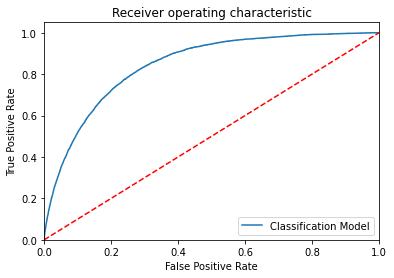

-----------------------------------------------------------------------------------------------------


In [31]:
# Training the XGB Classifier model on the Training set

from xgboost import XGBClassifier

# Build the model

modelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
#modelXGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, 
#                         colsample_bytree=1, eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type='gain',
#                         interaction_constraints='', learning_rate=0.300000012, max_delta_step=0, max_depth=6, 
#                         min_child_weight=1, missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=16,
#                         num_parallel_tree=1, objective='multi:softprob', random_state=0, reg_alpha=0, reg_lambda=1, 
#                         scale_pos_weight=None, subsample=1, tree_method='exact', use_label_encoder=False, 
#                         validate_parameters=1, verbosity=None)

# Fit the model with train data

modelXGB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = modelXGB.predict(x_test)
y_pred_prob = modelXGB.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,modelXGB.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [34]:
# Load the result dataset

CSResults = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Ensemble Learning\CancerResults.csv", header=0)
CSResults.head()

,Model Name,KNN K Value,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Compare XGBoost with other classification models

Method:  LogisticRegression()
Confusion matrix : 
 [[  877  7219]
 [  833 87010]]
Outcome values : 
 877 7219 833 87010
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.11      0.18      8096
           0       0.92      0.99      0.96     87843

    accuracy                           0.92     95939
   macro avg       0.72      0.55      0.57     95939
weighted avg       0.89      0.92      0.89     95939

Accuracy : 91.6 %
Precision : 51.3 %
Recall : 10.8 %
F1 Score : 0.179
Balanced Accuracy : 55.0 %
MCC : 0.208
roc_auc_score: 0.549


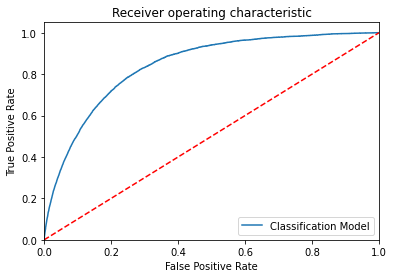

-----------------------------------------------------------------------
Method:  RandomForestClassifier(n_estimators=500, random_state=0)
Confusion matrix : 
 [[ 1030  7066]
 [ 1880 85963]]
Outcome values : 
 1030 7066 1880 85963
Classification report : 
               precision    recall  f1-score   support

           1       0.35      0.13      0.19      8096
           0       0.92      0.98      0.95     87843

    accuracy                           0.91     95939
   macro avg       0.64      0.55      0.57     95939
weighted avg       0.88      0.91      0.89     95939

Accuracy : 90.7 %
Precision : 35.4 %
Recall : 12.7 %
F1 Score : 0.187
Balanced Accuracy : 55.3 %
MCC : 0.172
roc_auc_score: 0.553


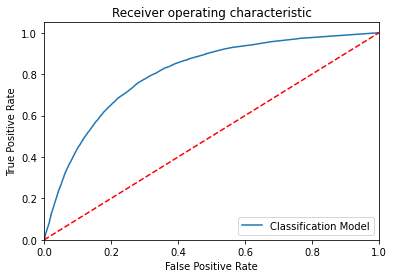

-----------------------------------------------------------------------
Method:  DecisionTreeClassifier(criterion='entropy')
Confusion matrix : 
 [[ 2060  6036]
 [ 6879 80964]]
Outcome values : 
 2060 6036 6879 80964
Classification report : 
               precision    recall  f1-score   support

           1       0.23      0.25      0.24      8096
           0       0.93      0.92      0.93     87843

    accuracy                           0.87     95939
   macro avg       0.58      0.59      0.58     95939
weighted avg       0.87      0.87      0.87     95939

Accuracy : 86.5 %
Precision : 23.0 %
Recall : 25.4 %
F1 Score : 0.242
Balanced Accuracy : 58.8 %
MCC : 0.168
roc_auc_score: 0.588


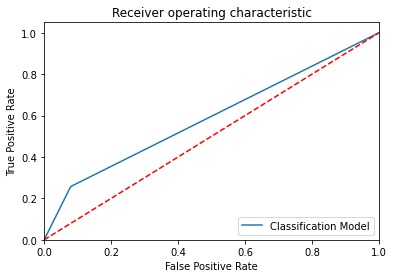

-----------------------------------------------------------------------
Method:  KNeighborsClassifier()
Confusion matrix : 
 [[ 1181  6915]
 [ 2105 85738]]
Outcome values : 
 1181 6915 2105 85738
Classification report : 
               precision    recall  f1-score   support

           1       0.36      0.15      0.21      8096
           0       0.93      0.98      0.95     87843

    accuracy                           0.91     95939
   macro avg       0.64      0.56      0.58     95939
weighted avg       0.88      0.91      0.89     95939

Accuracy : 90.6 %
Precision : 35.9 %
Recall : 14.6 %
F1 Score : 0.208
Balanced Accuracy : 56.1 %
MCC : 0.186
roc_auc_score: 0.561


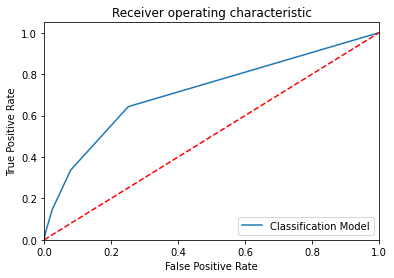

-----------------------------------------------------------------------
Method:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
Confusion matrix : 
 [[  754  7342]
 [  701 87142]]
Outcome values : 
 754 7342 701 87142
Classification report : 
               precision    recall  f1-score   support

    

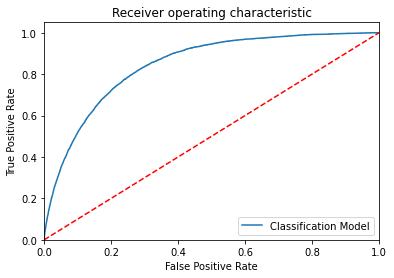

-----------------------------------------------------------------------


In [35]:
# Checking accuracy by changing base estimator - 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

# Build the model

modelLR = LogisticRegression()
modelRF = RandomForestClassifier(criterion='gini', n_estimators=500, random_state=0)
modelDT = DecisionTreeClassifier(criterion="entropy")
#modelSVMGaussian = SVC(kernel='rbf', random_state = None, class_weight=None,probability=True)
modelKNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30,
                                p=2, metric='minkowski', metric_params=None, n_jobs=None)

modelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')

MM = [modelLR, modelRF, modelDT, modelKNN, modelXGB]
for Models in MM:
    print("Method: ", Models)
        
    # fit the model with train data
    
    Models.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = Models.predict(x_test)
    y_pred_prob = Models.predict_proba(x_test)
    
    # Evaluate the model performance by metrics
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    matrix = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n',matrix)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3)
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test,Models.predict_proba(x_test)[:,1])
    plt.figure()
    
    # plt.plot
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    print('-----------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------
    new_row = {'Model Name' : Models,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)
    #-------------------------------------------------------------------------------------

In [25]:
# Load the result dataset

#CSResults = pd.read_csv(r"D:\00 DataScience\01-Internship\CSResults_30.csv", header=0)
CSResults.head()

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),0.916,0.513,0.108,0.179,0.991,0.208,0.549421,0.550
1,"(DecisionTreeClassifier(max_features='auto', r...",0.907,0.354,0.127,0.187,0.979,0.172,0.552911,0.553
2,DecisionTreeClassifier(criterion='entropy'),0.865,0.231,0.256,0.243,0.922,0.169,0.588618,0.589
3,KNeighborsClassifier(),0.906,0.360,0.146,0.208,0.976,0.187,0.560978,0.561
4,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.916,0.518,0.093,0.158,0.992,0.194,0.542576,0.542
